In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
import tensorflow.keras.backend as K
import numpy as np
from tensorflow import keras
import time
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import RandomFourierFeatures
import pandas as pd
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from __future__ import division
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('SVMData/test_feat.csv', index_col=0)

In [3]:
dataset = pd.get_dummies(dataset, columns=['gender'])
dataset.head()

,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,problem_save#num,...,course_id,age,education,user_enroll_num,course_enroll_num,cluster_label,course_category,gender_0,gender_1,gender_2
enroll_id,,,,,,,,,,,,,,,,,,,,,
131072,-0.225912,-0.225912,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.042412,-0.305844,-0.202161,...,course-v1:TsinghuaX+20220053X_2015_T2+2015_T2,-0.599969,0,0.080526,-0.740180,2,0,0,1,0
131073,-0.224675,-0.224675,-0.243043,-0.296739,-0.333535,-0.059298,-0.445267,-0.042412,-0.305844,-0.202161,...,course-v1:TsinghuaX+20220053X_2015_T2+2015_T2,-0.599969,0,-0.183797,-0.740180,2,0,1,0,0
393217,-0.225912,-0.225912,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.036598,-0.305844,0.175968,...,course-v1:UC_BerkeleyX+ColWri2_1x_2015_T1+2016_TS,-0.599969,0,-0.271904,-0.695476,2,0,1,0,0
393221,-0.206120,-0.206120,-0.243043,-0.269383,-0.296012,-0.059298,-0.409566,-0.042412,-0.305844,-0.202161,...,course-v1:UC_BerkeleyX+ColWri2_1x_2015_T1+2016_TS,1.069233,1,-0.360012,-0.695476,2,0,0,0,1
131079,-0.229624,-0.229624,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.042412,-0.305844,-0.202161,...,course-v1:TsinghuaX+20220053X_2015_T2+2015_T2,-0.599969,0,0.344849,-0.740180,2,0,1,0,0


In [4]:
dataset = pd.get_dummies(dataset, columns=['education'])
dataset.head()

,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,problem_save#num,...,gender_1,gender_2,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7
enroll_id,,,,,,,,,,,,,,,,,,,,,
131072,-0.225912,-0.225912,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.042412,-0.305844,-0.202161,...,1,0,1,0,0,0,0,0,0,0
131073,-0.224675,-0.224675,-0.243043,-0.296739,-0.333535,-0.059298,-0.445267,-0.042412,-0.305844,-0.202161,...,0,0,1,0,0,0,0,0,0,0
393217,-0.225912,-0.225912,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.036598,-0.305844,0.175968,...,0,0,1,0,0,0,0,0,0,0
393221,-0.206120,-0.206120,-0.243043,-0.269383,-0.296012,-0.059298,-0.409566,-0.042412,-0.305844,-0.202161,...,0,1,0,1,0,0,0,0,0,0
131079,-0.229624,-0.229624,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.042412,-0.305844,-0.202161,...,0,0,1,0,0,0,0,0,0,0


In [5]:
target = dataset.pop('truth')
trash= dataset.pop('course_id')
trash2= dataset.pop('course_category')
trash3 = dataset.pop('cluster_label')
dataset.head()

,all#count,session#count,seek_video#num,play_video#num,pause_video#num,stop_video#num,load_video#num,problem_get#num,problem_check#num,problem_save#num,...,gender_1,gender_2,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7
enroll_id,,,,,,,,,,,,,,,,,,,,,
131072,-0.225912,-0.225912,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.042412,-0.305844,-0.202161,...,1,0,1,0,0,0,0,0,0,0
131073,-0.224675,-0.224675,-0.243043,-0.296739,-0.333535,-0.059298,-0.445267,-0.042412,-0.305844,-0.202161,...,0,0,1,0,0,0,0,0,0,0
393217,-0.225912,-0.225912,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.036598,-0.305844,0.175968,...,0,0,1,0,0,0,0,0,0,0
393221,-0.206120,-0.206120,-0.243043,-0.269383,-0.296012,-0.059298,-0.409566,-0.042412,-0.305844,-0.202161,...,0,1,0,1,0,0,0,0,0,0
131079,-0.229624,-0.229624,-0.243043,-0.296739,-0.333535,-0.059298,-0.480968,-0.042412,-0.305844,-0.202161,...,0,0,1,0,0,0,0,0,0,0


In [6]:
# Spliting into 80% for training set and 20% for testing set so we can see our accuracy
X_train, x_test, Y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=0)


In [7]:
from sklearn.svm import SVR
regression_model = SVR(kernel='linear', C=1.0)
regression_model.fit(X_train, Y_train)

SVR(kernel='linear')

In [8]:
regression_model.coef_

array([[-3.95878241e+01, -3.95878241e+01,  3.86990443e+01,
        -5.74747317e+01, -1.08858521e+02,  1.21623014e+02,
        -2.48598793e+02, -1.56215015e+02, -5.91532254e+02,
         1.07878542e+02, -1.16892320e+02, -2.91062482e+02,
        -5.38043639e+02,  4.01436929e+02,  4.52858961e+02,
         1.25433579e+02, -1.31774481e+01,  7.37244299e+01,
        -2.75546600e+02,  1.83459240e+02,  1.81042252e+02,
        -5.48508617e+02, -1.45850517e+02,  1.32063806e-01,
         5.69270379e+02, -1.05160662e+03,  2.18754241e+02,
        -1.11070375e+02, -3.21034202e+01,  1.43173795e+02,
        -1.98173795e+02,  1.54173795e+02, -5.00000000e+01,
         3.60000000e+01, -1.00000000e+00,  4.10000000e+01,
        -2.00000000e+00,  2.00000000e+01]])

In [9]:
regression_model.score(X_train, Y_train)

-402692356417.88385

<AxesSubplot:title={'center':'Modal Coefficients'}>

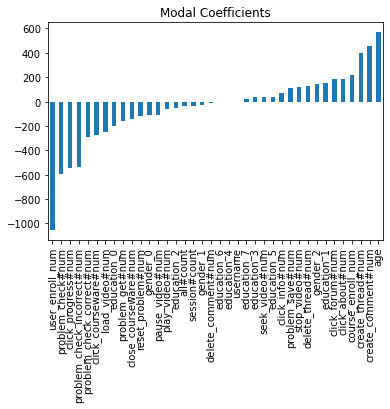

In [10]:
from pandas import Series
import matplotlib.pyplot as plt
%matplotlib inline

predictors = X_train.columns
coef = Series(regression_model.coef_[0],predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [12]:
from sklearn.metrics import mean_squared_error

y_predict = regression_model.predict(x_test)

Populating the interactive namespace from numpy and matplotlib


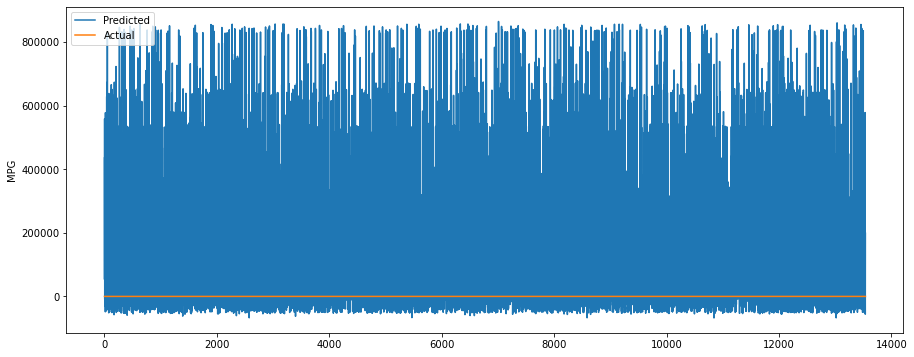

In [13]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 6)

plt.plot(y_predict, label='Predicted')
plt.plot(y_test.values, label='Actual')
plt.ylabel('MPG')

plt.legend()
plt.show()

In [14]:
regression_model.score(x_test, y_test)

-407372349736.7683

In [15]:
regression_model_mse = mean_squared_error(y_predict, y_test)
regression_model_mse

73965747358.12404

In [16]:
import math

math.sqrt(regression_model_mse)

271966.4452797882